In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

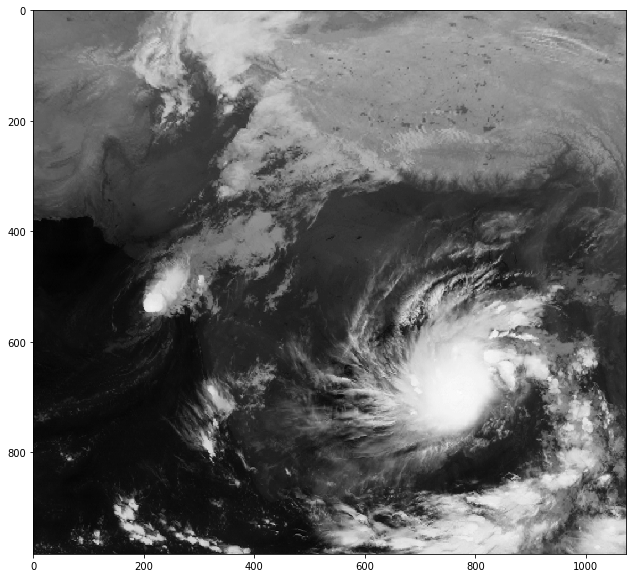

In [2]:
img14=cv2.imread('F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_0000_L1C_SGP.tif',-1).astype(np.float32)/255
img14=cv2.cvtColor(img14,cv2.COLOR_BGR2RGB)
img14=cv2.cvtColor(img14, cv2.COLOR_BGR2GRAY)
#uu=load_img()
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.imshow(img14,cmap='gray')

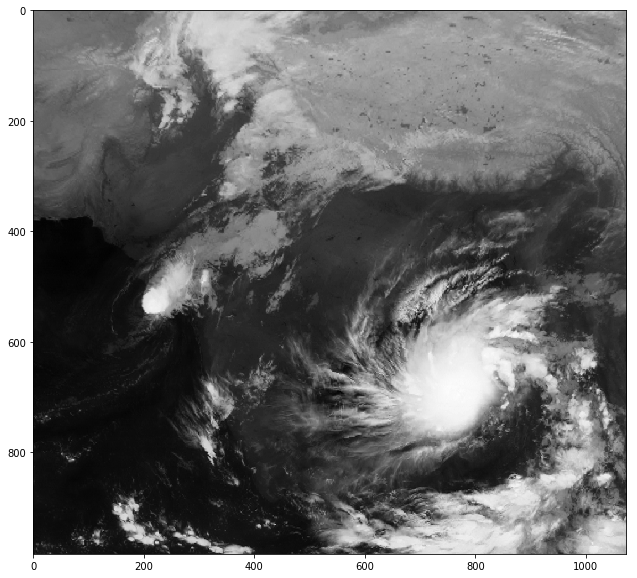

In [3]:
im0=cv2.imread('F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_0030_L1C_SGP.tif',-1).astype(np.float32)/255
im0=cv2.cvtColor(im0,cv2.COLOR_BGR2RGB)
im0=cv2.cvtColor(im0, cv2.COLOR_BGR2GRAY)
#uu=load_img()
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.imshow(im0,cmap='gray')

In [7]:
import os

L=os.listdir('F:\\SIH20\\cloud\\INSAT3D_TIR1_India')
L2=os.listdir('F:\\SIH20\\cloud\\INSAT3D_VIS_India')

#print(L2)

In [32]:
import cv2
import numpy as np
from imageio import imread

t='F:'+'\\'+'SIH20'+'\\'+'cloud'+'\\'+'INSAT3D_TIR1_India'+'\\'+L[0]
t=cv2.imread(t,-1).astype(np.float32)/255
t=cv2.cvtColor(t,cv2.COLOR_BGR2RGB)
t=cv2.cvtColor(t,cv2.COLOR_RGB2GRAY)
for i in L[1:44]:
    nn='F:'+'\\'+'SIH20'+'\\'+'cloud'+'\\'+'INSAT3D_TIR1_India'+'\\'+i
    im=cv2.imread(nn,-1)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
    min1=np.amin(img14)
    max1=np.amax(img14)
    num1=(img14-min1)*255
    den1=(max1-min1)
    img14=num1/den1
    min1=np.amin(im)
    max1=np.amax(im)
    num1=(im-min1)*255
    den1=(max1-min1)
    im=num1/den1
    im1 = np.asarray(img14)
    im2 = np.asarray(im)


    flow = cv2.calcOpticalFlowFarneback(im1, im2,3, 0.5, 3, 15, 3, 5, 1.2, 0)

    def draw_hsv(flow):
        h, w = flow.shape[:2]
        fx, fy = flow[:,:,0], flow[:,:,1]
        ang = np.arctan2(fy, fx) + np.pi
        v = np.sqrt(fx*fx+fy*fy)
        hsv = np.zeros((h, w, 3), np.uint8)
        hsv[...,0] = ang*(180/np.pi/2)
        hsv[...,1] = 255
        hsv[...,2] = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        return bgr

    def warp_flow(img, flow):
        h, w = flow.shape[:2]
        flow = -flow
        flow[:,:,0] += np.arange(w)
        flow[:,:,1] += np.arange(h)[:,np.newaxis]
        res = cv2.remap(img, flow, None, cv2.INTER_LINEAR)
        return res

    hsv = draw_hsv(flow)
    im2w = warp_flow(im1, flow)
    """cv2.imwrite("/tmp/flow.jpg",hsv)
    cv2.imwrite("/tmp/im1.jpg", im1)
    cv2.imwrite("/tmp/im2.jpg", im2)
    cv2.imwrite("/tmp/im2w.jpg", im2w)"""
    img14=im
    
    

In [9]:
nn

'F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_2300_L1C_SGP.tif'

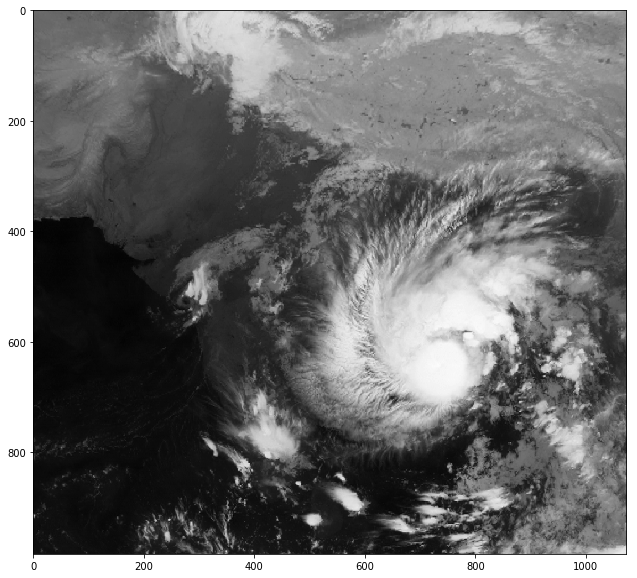

In [28]:
im1=cv2.imread('F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_2230_L1C_SGP.tif',-1).astype(np.float32)/255
im1=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
#uu=load_img()
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.imshow(im1,cmap='gray')

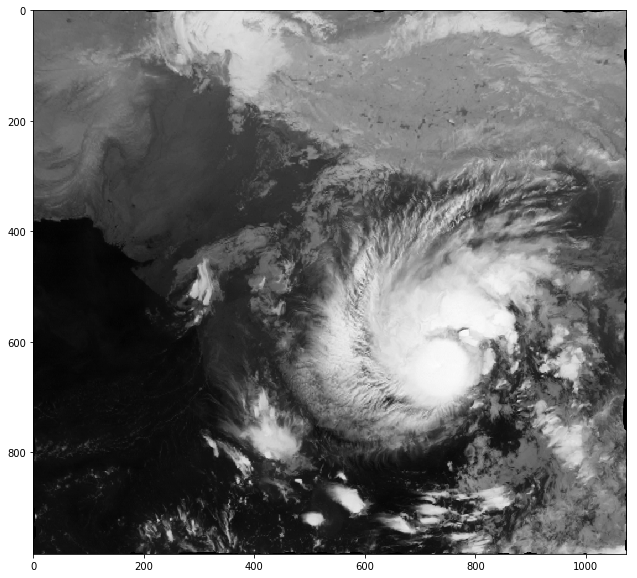

In [35]:
#im2w=cv2.imread('F:\\SIH20\\cloud\\INSAT3D_TIR1_India\\3DIMG_07NOV2019_0000_L1C_SGP.tif',-1).astype(np.float32)/255

im2w=cv2.cvtColor(im2w,cv2.COLOR_BGR2RGB)
im2w=cv2.cvtColor(im2w, cv2.COLOR_BGR2GRAY)
#uu=load_img()
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.imshow(im2w,cmap='gray')

In [34]:
min1=np.amin(im2w)
max1=np.amax(im2w)
num1=(im2w-min1)*255
den1=(max1-min1)
im2w=num1/den1
min1=np.amin(im1)
max1=np.amax(im1)
num1=(im1-min1)*255
den1=(max1-min1)
im1=num1/den1
sum1=0;
x=1
y=1
for x in range(984):
    
     for y in range(1074):
       
           difference =im1[x][y] - im2w[x][y]
           sum1 = sum1 + difference*difference
       
mse = sum1 /(984*1074)
print(mse)

319.7480321179598


In [55]:
flow.shape

(984, 1074, 2)

In [60]:
flow[:,:,0]

array([[-1.09591929e-04, -2.65202485e-04, -3.93464870e-04, ...,
        -2.05948893e-02, -9.07261577e-03, -4.96032368e-03],
       [-1.43364392e-04, -4.09151718e-04, -7.05234008e-04, ...,
        -2.76480559e-02, -1.35724731e-02, -7.89033063e-03],
       [-1.35548034e-04, -4.98694542e-04, -1.12051424e-03, ...,
        -3.35063823e-02, -1.85403544e-02, -1.14179393e-02],
       ...,
       [ 1.00747252e+00,  1.23372734e+00,  1.53509688e+00, ...,
        -1.34243056e-01, -1.29501328e-01, -1.04905225e-01],
       [ 7.89355814e-01,  1.01982963e+00,  1.38680685e+00, ...,
        -8.67907554e-02, -8.10191929e-02, -6.22559674e-02],
       [ 4.04239029e-01,  6.44003332e-01,  1.09979236e+00, ...,
        -5.27472012e-02, -4.88588214e-02, -3.50936688e-02]], dtype=float32)

In [69]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(cv.samples.findFile("C:\\Users\\Amritanjali\\Downloads\\Figure 1 2020-01-14 22-46-12.mp4"))
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
while(1):
    ret, frame2 = cap.read()
    next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
    cv.imshow('frame2',bgr)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb.png',frame2)
        cv.imwrite('opticalhsv.png',bgr)
    prvs = next

In [ ]:
cv2.getAffineTransform(src, dst) 

In [15]:
im1w = warp_flow(im, flow)